In [2]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
# Right click on the BANA6350>Data folder and copy the folder path by click "Copy Path". Then paste that inside the code below to link your folder where all the data will reside

import os

path = "/content/gdrive/MyDrive/BANA7350/Data"

os.chdir(path)

# the above code will change your current working directory to the path i.e., BANA6350/Data folder
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('a10.csv').head()

Mounted at /content/gdrive/


,index,a10
0,1991 Jul,3.526591
1,1991 Aug,3.180891
2,1991 Sep,3.252221
3,1991 Oct,3.611003
4,1991 Nov,3.565869


In [3]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [4]:
!pip install fredapi

In [5]:
from fredapi import Fred #importing Fred from fredapi
fred = Fred(api_key="9e0f82a9fddc7a0463c03b379d992d96") #creati ng a variable called fred with my api key

In [6]:
# Series_ID = TXUR  ||  https://fred.stlouisfed.org/series/TXUR

In [14]:
import pandas as pd

df = pd.read_csv('TXUR.csv') #reading the downloaded data
df.columns

Index(['DATE', 'TXUR'], dtype='object')

In [15]:
df = df.rename(columns={"TXUR":"Unemployment Rate"})    # Changes the column name from RSFHFSN to Retail Sales
df.columns

Index(['DATE', 'Unemployment Rate'], dtype='object')

In [16]:
# Ensure the DATE column is in datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the DATE column as the index and assign frequency
df.set_index('DATE', inplace=True)
df.index.name = 'Date'
df = df.asfreq('MS')

In [67]:
df.index.freq = 'MS'     # to ensure we have a monthly Frequency we used MS = Month Start (e.g., 1/1/2020), M = Month End (e.g., 1/31/2020), YS = Year Start (1/1/2020) , Y = Year End (e.g., 12/31/2020), similarly Q, QS etc.
df

,DATE,TXUR
0,1976-01-01,5.8
1,1976-02-01,5.8
2,1976-03-01,5.9
3,1976-04-01,5.9
4,1976-05-01,5.9
...,...,...
575,2023-12-01,3.9
576,2024-01-01,3.9
577,2024-02-01,3.9
578,2024-03-01,3.9


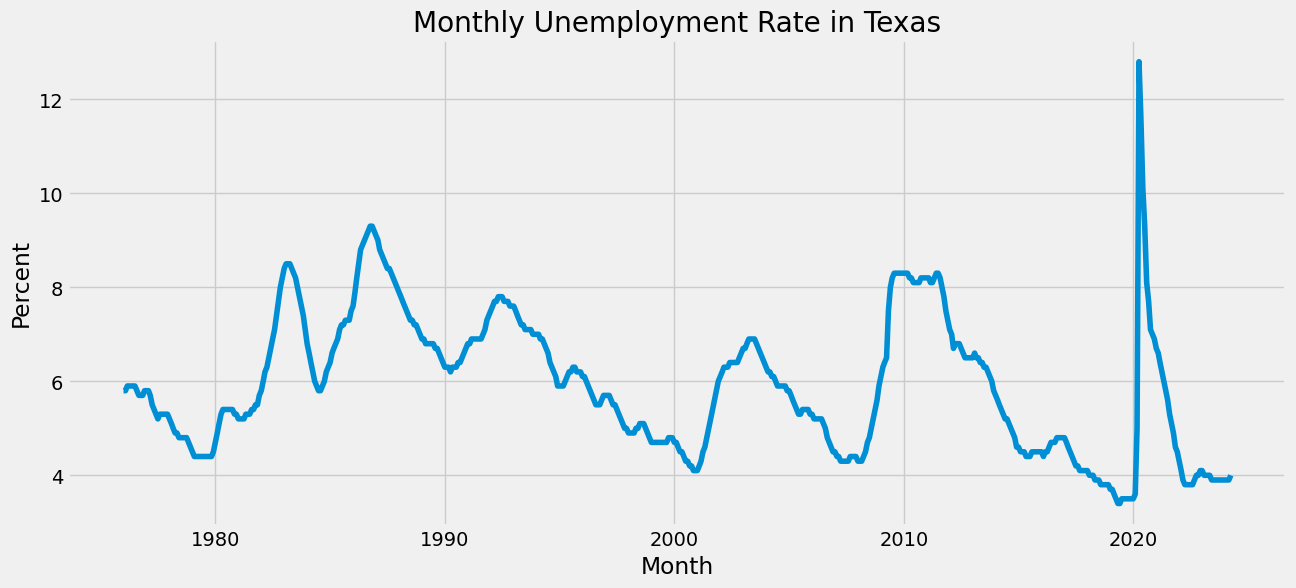

In [18]:
plt.title("Monthly Unemployment Rate in Texas")
plt.xlabel("Month")
plt.ylabel("Percent")

plt.plot(df)

In [19]:
#3 Month Rolling Average

rollingsum_3 = df['Unemployment Rate'].rolling(window =3, center = True)
rolling3Month = rollingsum_3.mean()
rolling3Month

Date
1976-01-01         NaN
1976-02-01    5.833333
1976-03-01    5.866667
1976-04-01    5.900000
1976-05-01    5.900000
                ...   
2023-12-01    3.900000
2024-01-01    3.900000
2024-02-01    3.900000
2024-03-01    3.933333
2024-04-01         NaN
Freq: MS, Name: Unemployment Rate, Length: 580, dtype: float64

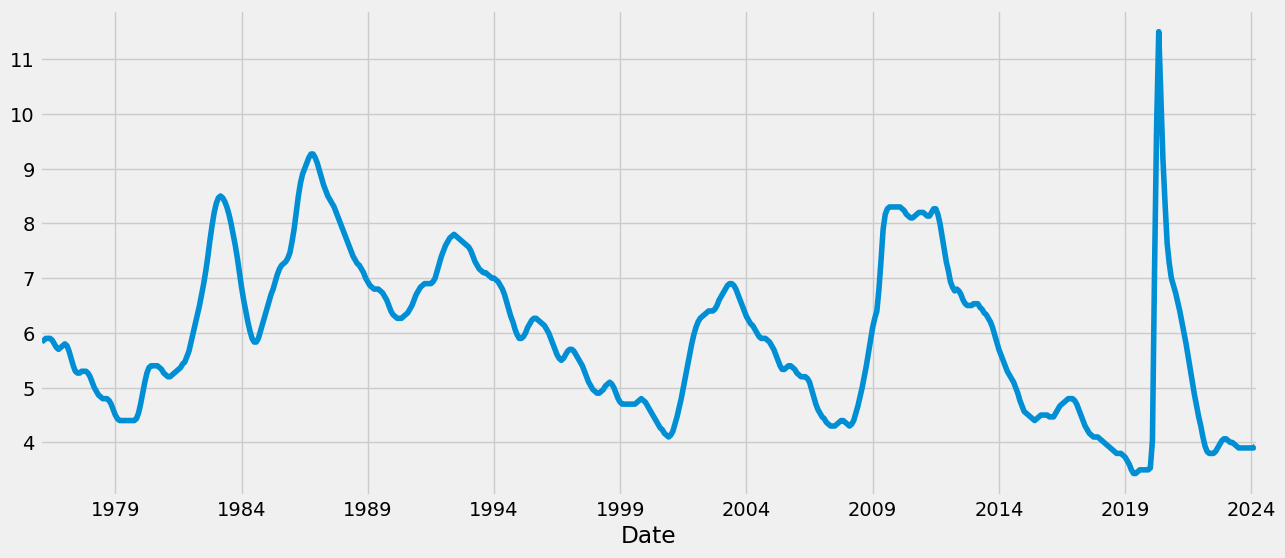

In [20]:
rolling3Month.plot(label = "3 Month")
plt.show()

In [21]:
#12 Month Rolling Average

rollingsum_12 = df['Unemployment Rate'].rolling(window = 12, center = True)
rolling12Month = rollingsum_12.mean()
rolling12Month

Date
1976-01-01   NaN
1976-02-01   NaN
1976-03-01   NaN
1976-04-01   NaN
1976-05-01   NaN
              ..
2023-12-01   NaN
2024-01-01   NaN
2024-02-01   NaN
2024-03-01   NaN
2024-04-01   NaN
Freq: MS, Name: Unemployment Rate, Length: 580, dtype: float64

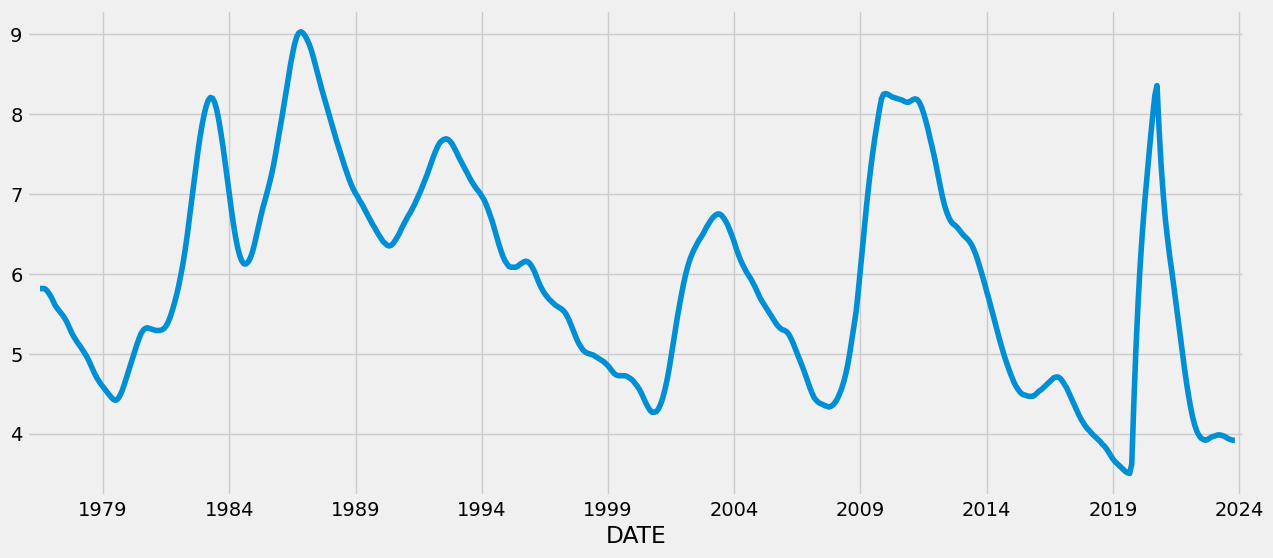

In [18]:
rolling12Month.plot(label = "12 Month")
plt.show()

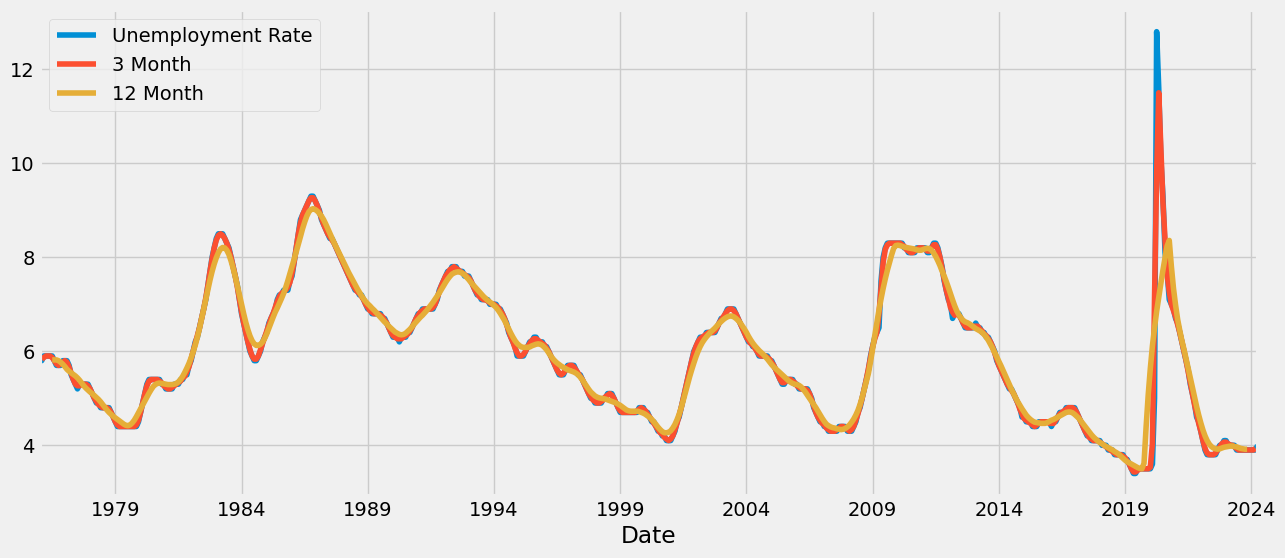

In [22]:
df.plot(label = "original data")
rolling3Month.plot(label = "3 Month")
rolling12Month.plot(label = "12 Month")
plt.legend()
plt.show()

In [24]:
!pip install sktime
import sktime as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.base import ForecastingHorizon

from sktime.utils.plotting import plot_series
from sktime.utils.plotting import plot_correlations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 12.6 MB/s eta 0:00:00


In [31]:
y = df['Unemployment Rate']
y.index = pd.PeriodIndex(y.index, freq="M")   # the frequency assigned as freq='M' for month, and index type changed

y.index

PeriodIndex(['1976-01', '1976-02', '1976-03', '1976-04', '1976-05', '1976-06',
             '1976-07', '1976-08', '1976-09', '1976-10',
             ...
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01', '2024-02', '2024-03', '2024-04'],
            dtype='period[M]', name='Date', length=580)

In [32]:
train_size =  int(len(y) * 0.70)
y_train      =  y[0:train_size]
y_test       =  y[train_size:]

y_train
y_test


Date
2009-11    8.3
2009-12    8.3
2010-01    8.3
2010-02    8.3
2010-03    8.3
          ... 
2023-12    3.9
2024-01    3.9
2024-02    3.9
2024-03    3.9
2024-04    4.0
Freq: M, Name: Unemployment Rate, Length: 174, dtype: float64

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Unemployment Rate'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

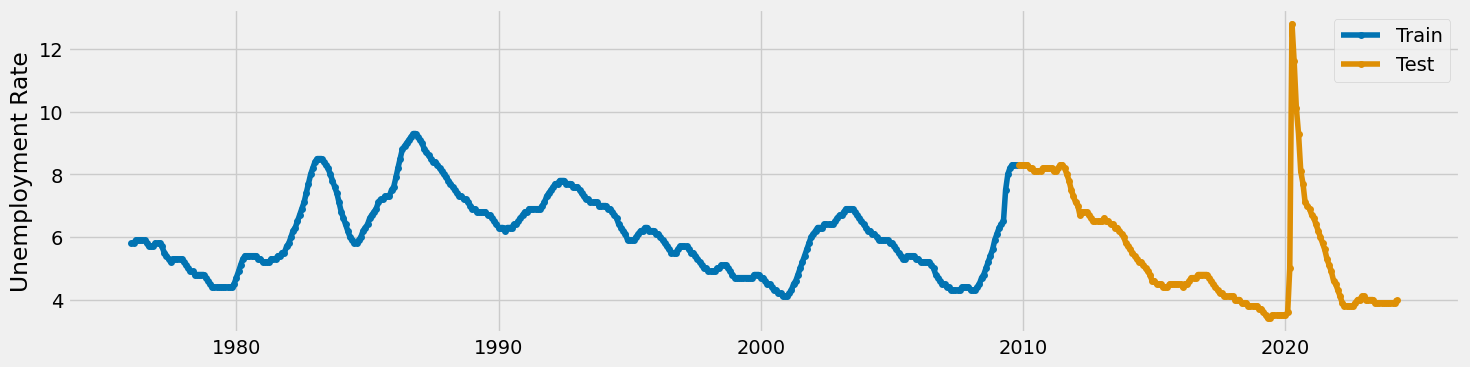

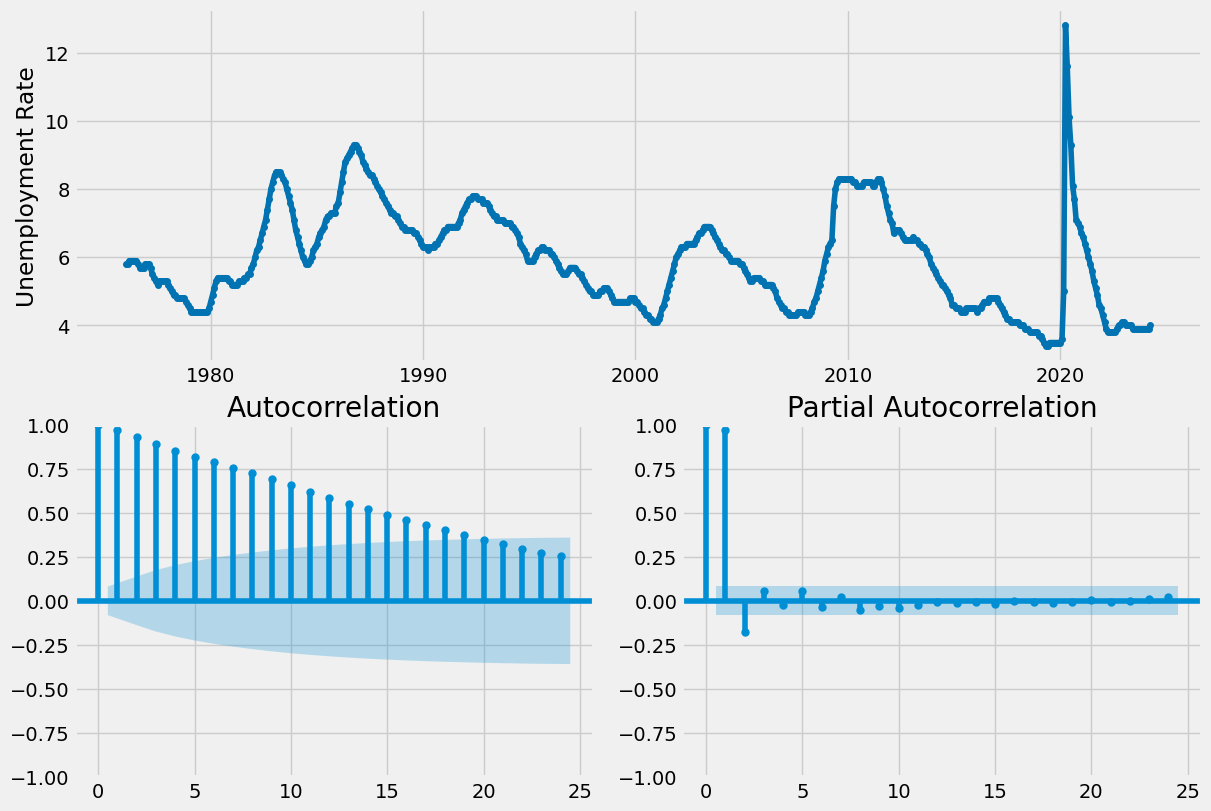

In [33]:
plot_series(y_train, y_test, labels=["Train", "Test"])

plot_correlations(y, lags=24, alpha=0.05)


In [34]:
test_horizon = ForecastingHorizon(y_test.index, is_relative=False)
test_horizon

ForecastingHorizon(['2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04',
             '2010-05', '2010-06', '2010-07', '2010-08',
             ...
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01', '2024-02', '2024-03', '2024-04'],
            dtype='period[M]', length=174, is_relative=False)

In [35]:
train_horizon = ForecastingHorizon(y_train.index, is_relative=False)
train_horizon

ForecastingHorizon(['1976-01', '1976-02', '1976-03', '1976-04', '1976-05', '1976-06',
             '1976-07', '1976-08', '1976-09', '1976-10',
             ...
             '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
             '2009-07', '2009-08', '2009-09', '2009-10'],
            dtype='period[M]', length=406, is_relative=False)

In [36]:
#Historic Mean
model_historic_mean = NaiveForecaster(strategy='mean')           # here you are declaring a model, and a method to use
fit_historic_mean = model_historic_mean.fit(y_train)             # here you are training/fitting the model on the y_train data set

fcast_historic_mean = fit_historic_mean.predict(test_horizon)    # here you are predicting over the y_test data set / time index
fcast_historic_mean

2009-11    6.111084
2009-12    6.111084
2010-01    6.111084
2010-02    6.111084
2010-03    6.111084
             ...   
2023-12    6.111084
2024-01    6.111084
2024-02    6.111084
2024-03    6.111084
2024-04    6.111084
Freq: M, Name: Unemployment Rate, Length: 174, dtype: float64

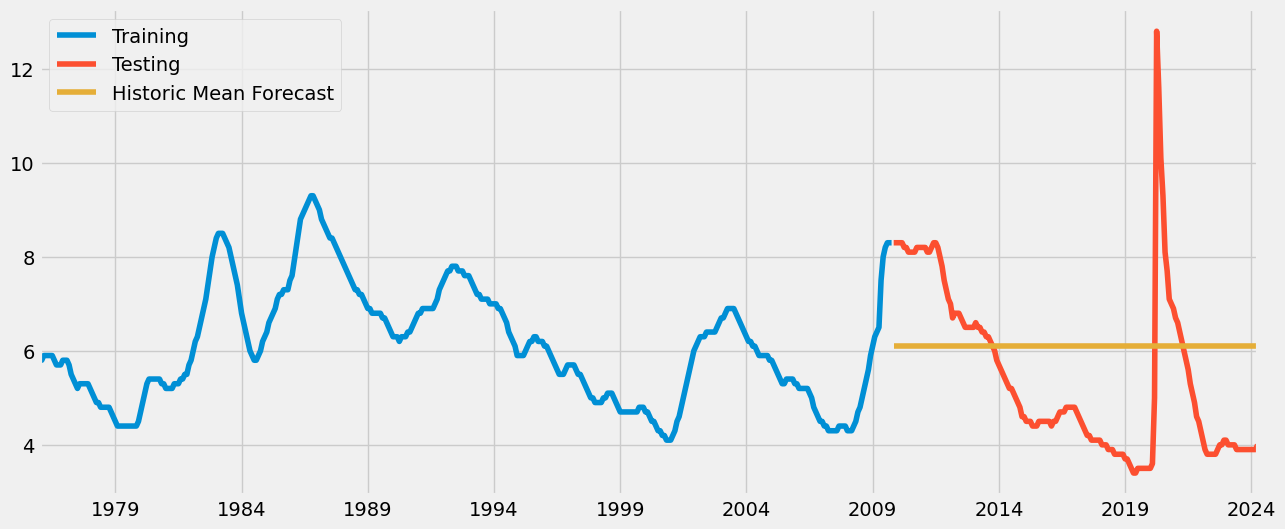

In [37]:
# now plot the actual vs. forecast

y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_historic_mean.plot(label='Historic Mean Forecast')
plt.legend()

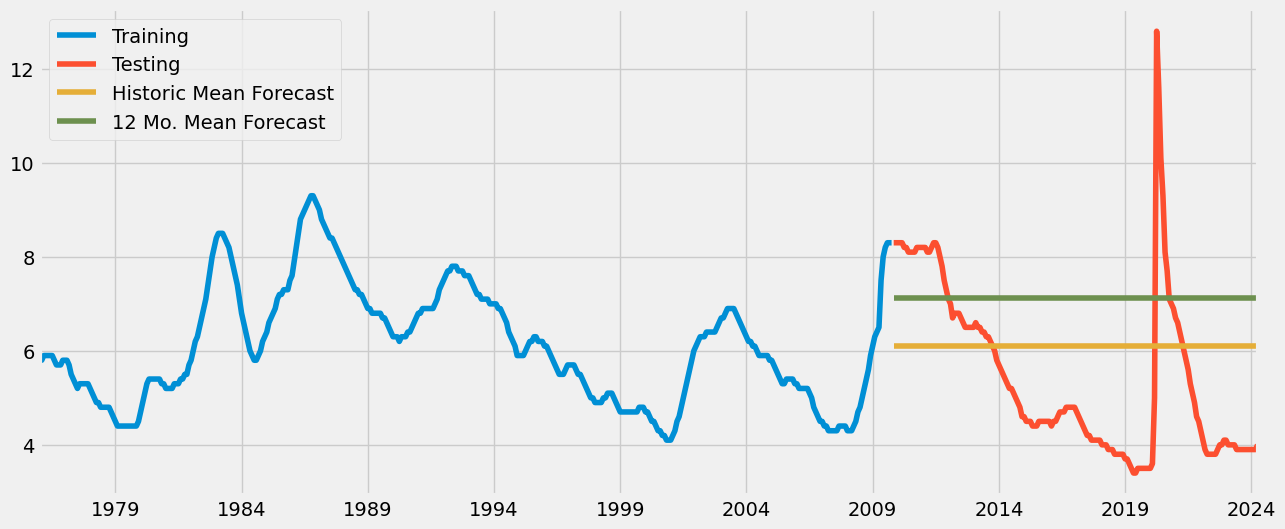

In [38]:
# historic mean from a specific window (e.g., last 12 month's mean)
#*****************************************************************

model_12mo_mean = NaiveForecaster(strategy='mean',window_length=12)
fit_12mo_mean = model_12mo_mean.fit(y_train)

fcast_12mo_mean = fit_12mo_mean.predict(test_horizon)
fcast_12mo_mean

fcast_12mo_mean

# now plot the actual vs. forecast

y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_historic_mean.plot(label='Historic Mean Forecast')
fcast_12mo_mean.plot(label='12 Mo. Mean Forecast')
plt.legend()

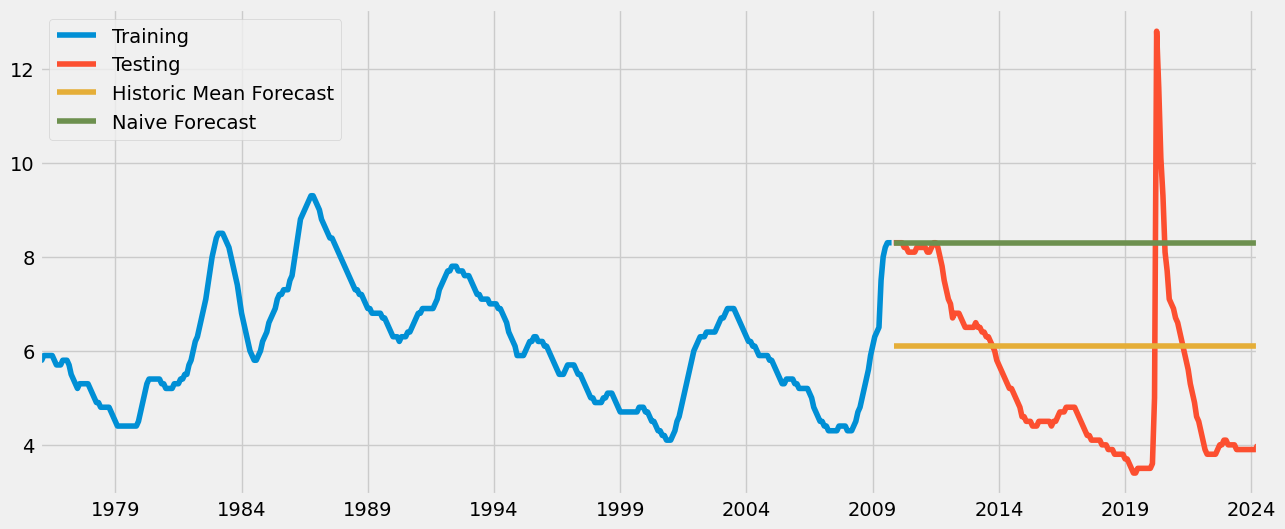

In [39]:
# Naive forecast, where the latest value continues into the future: Best for Random Walk data
#*********************************************************************************************

model_naive = NaiveForecaster(strategy='last')
fit_naive= model_naive.fit(y_train)

fcast_naive = fit_naive.predict(test_horizon)
fcast_naive

# now plot the actual vs. forecast

y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_historic_mean.plot(label='Historic Mean Forecast')
fcast_naive.plot(label='Naive Forecast')
plt.legend()

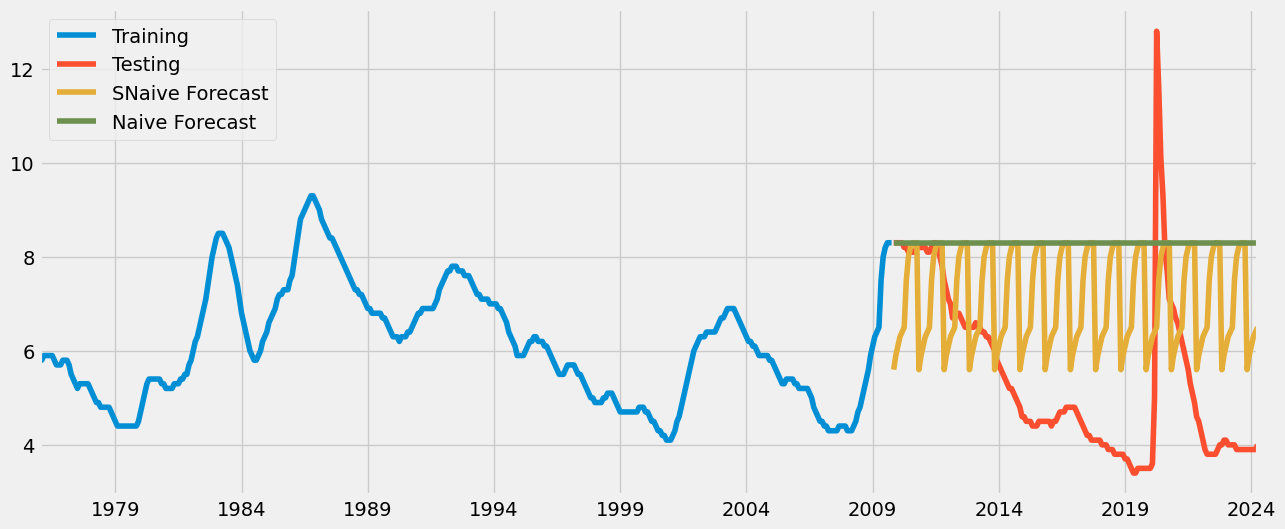

In [40]:
# Seasonal-Naive forecast (SNaive), where the vaalues from the last season repeats(e.g., Jan 2019 for Jan 2020, Feb 2019 for Feb 2020 etc.)
#*********************************************************************************************

model_snaive = NaiveForecaster(strategy='last', sp=12)     # sp = seasonal periodicity , where we are asking 12 months of seasonality to repeat, e.g., from Jan to Jan, Feb to Feb etc
fit_snaive= model_snaive.fit(y_train)

fcast_snaive = fit_snaive.predict(test_horizon)
fcast_snaive


# now plot the actual vs. forecast

y_train.plot(label='Training')
y_test.plot(label='Testing')
fcast_snaive.plot(label='SNaive Forecast')
fcast_naive.plot(label='Naive Forecast')
plt.legend()

In [41]:
import os

import numpy as np


from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import DecomposeResult

import statsmodels.api as sm

,Unemployment Rate,Observed,Trend,Seasonal,Resid
Date,,,,,
1976-01-01,5.8,5.8,NaN,-0.062295,NaN
1976-02-01,5.8,5.8,NaN,-0.067348,NaN
1976-03-01,5.9,5.9,NaN,-0.055558,NaN
1976-04-01,5.9,5.9,NaN,0.096570,NaN
1976-05-01,5.9,5.9,NaN,0.089123,NaN
...,...,...,...,...,...
2023-12-01,3.9,3.9,NaN,-0.042437,NaN
2024-01-01,3.9,3.9,NaN,-0.062295,NaN
2024-02-01,3.9,3.9,NaN,-0.067348,NaN


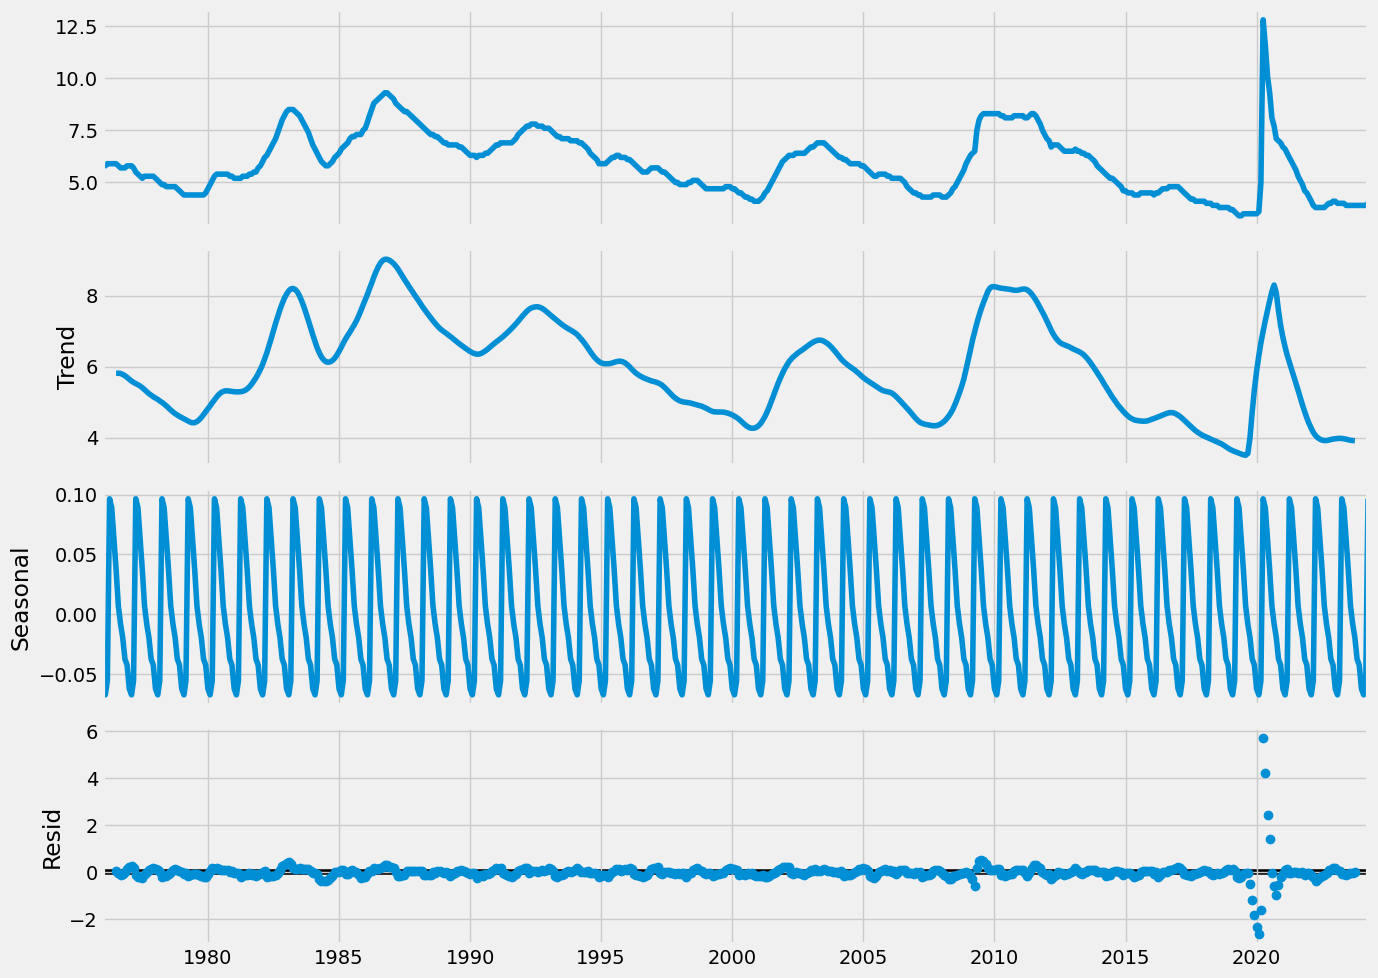

In [42]:
#Classical Decomposition
plt.rcParams['figure.figsize'] = [14.0, 10.0]   # Decomposition comes with 4 plots, so increasing the chart area
decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()

df['Observed'] = decomposition.observed
df['Trend'] = decomposition.trend
df['Seasonal'] = decomposition.seasonal
df['Resid'] = decomposition.resid

df

In [44]:
#STL Decomposition
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm

RangeIndex(start=0, stop=580, step=1)

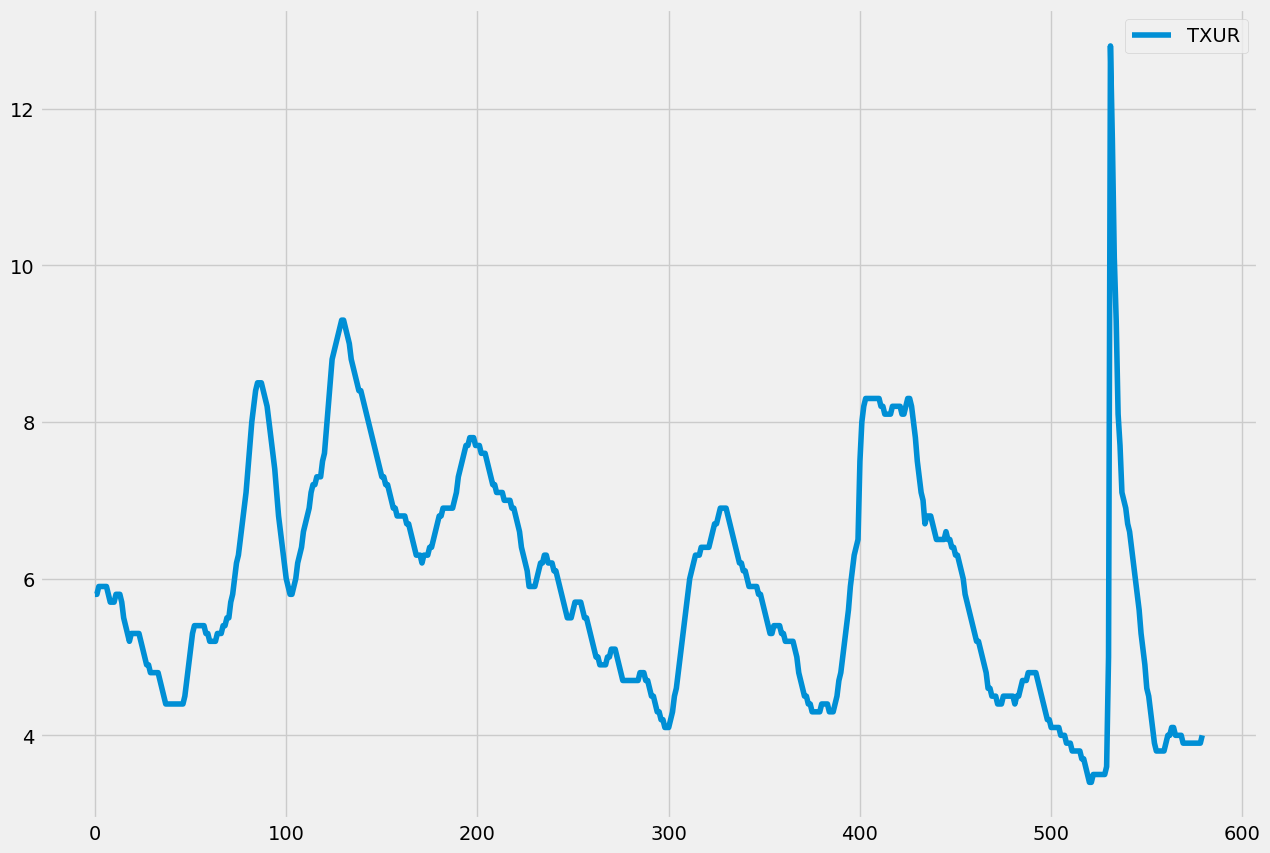

In [64]:
df = pd.read_csv('TXUR.csv') #reading the downloaded data
df.plot()


In [73]:
df = df.rename(columns={"TXUR":"Unemployment Rate"})    # Changes the column name from RSFHFSN to Retail Sales
df.columns

Index(['Unemployment Rate'], dtype='object')

In [74]:
df.index.freq = 'MS'


In [75]:
df.columns

Index(['Unemployment Rate'], dtype='object')

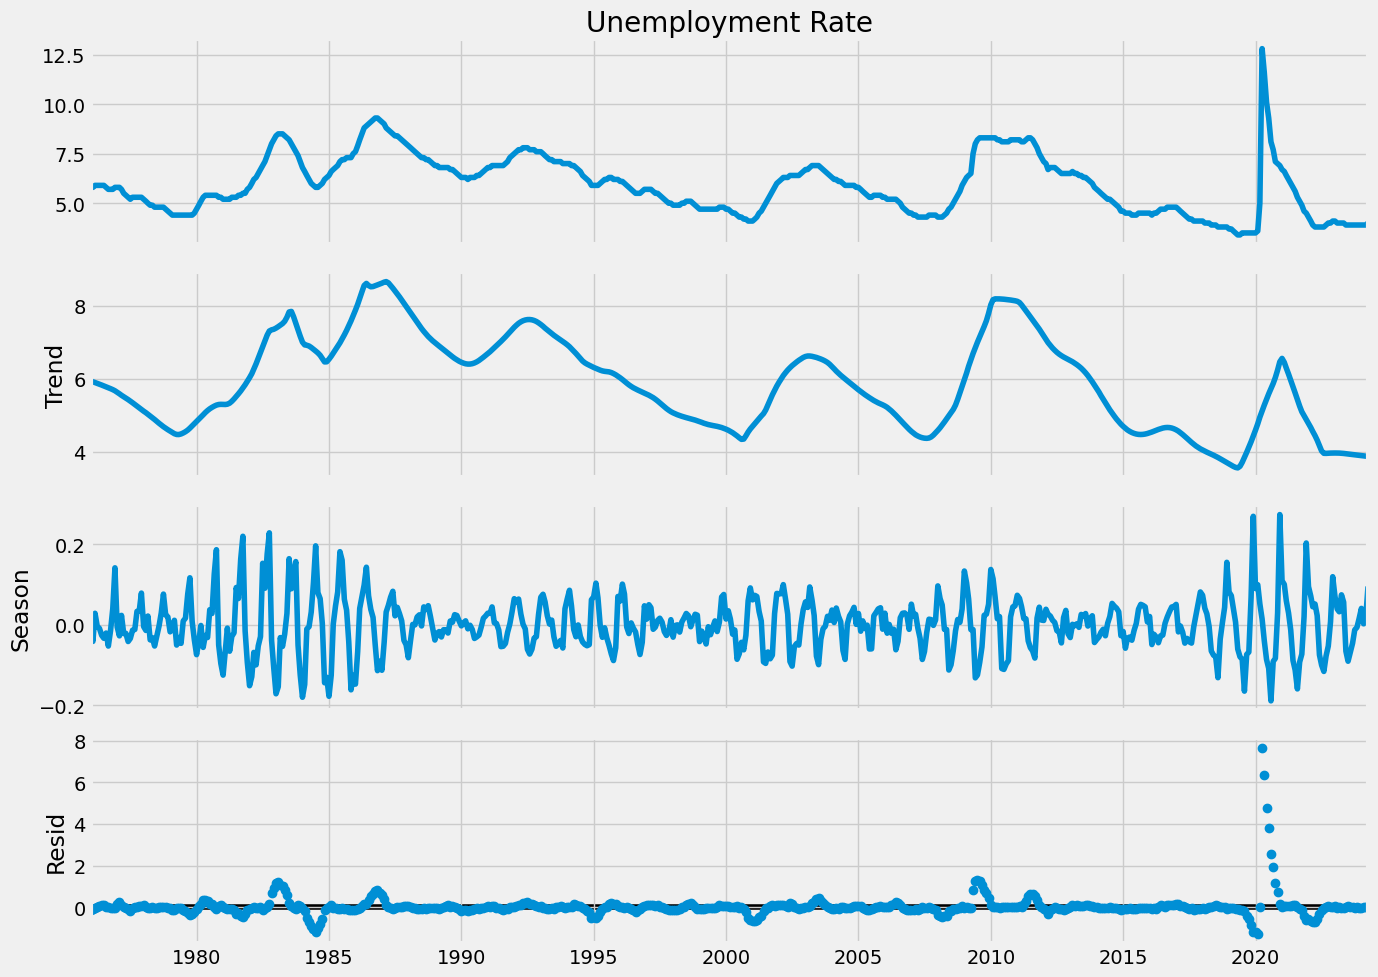

In [77]:


# Use the appropriate numeric column for STL
model = STL(df['Unemployment Rate'], robust=True)
fit = model.fit()
fit.plot()
plt.show()

In [78]:
df['Observed'] = fit.observed
df['Trend'] = fit.trend
df['Seasonal'] = fit.seasonal
df['Resid'] = fit.resid

df

,Unemployment Rate,Observed,Trend,Seasonal,Resid
DATE,,,,,
1976-01-01,5.8,5.8,5.943808,-0.011907,-0.131901
1976-02-01,5.8,5.8,5.922810,-0.041686,-0.081125
1976-03-01,5.9,5.9,5.901098,0.028354,-0.029452
1976-04-01,5.9,5.9,5.878730,-0.004208,0.025478
1976-05-01,5.9,5.9,5.855797,-0.009173,0.053376
...,...,...,...,...,...
2023-12-01,3.9,3.9,3.907889,0.015603,-0.023492
2024-01-01,3.9,3.9,3.900568,0.040528,-0.041095
2024-02-01,3.9,3.9,3.893152,0.002103,0.004745


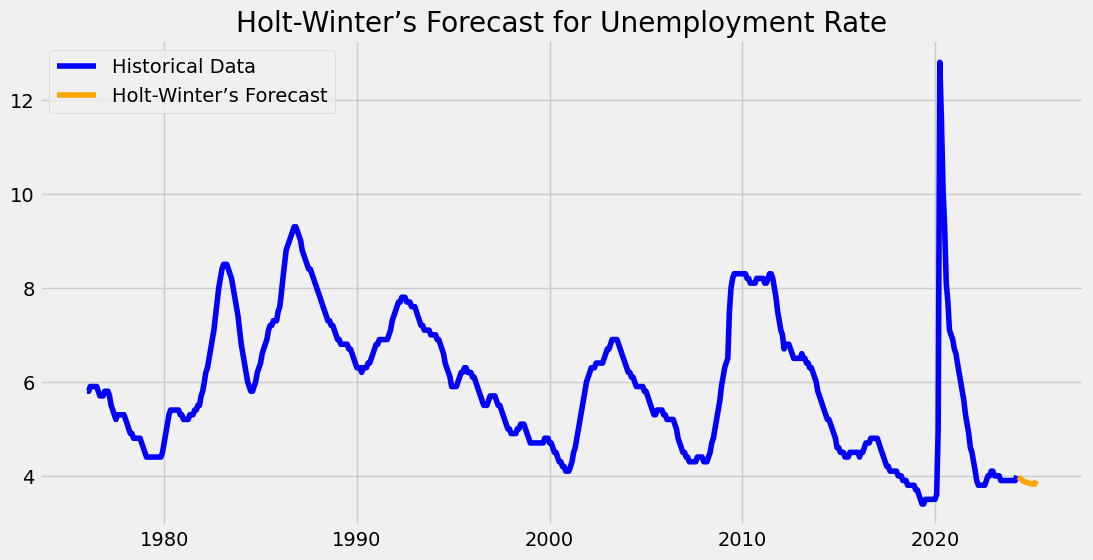

In [82]:
#Holt-Winters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming df is your DataFrame and it's already set with DATE as the index
data = df['Unemployment Rate']

# Fit the Holt-Winter's model
holt_winters_model = ExponentialSmoothing(
    data,
    trend='mul',        # Choose 'add' or 'mul' for trend
    seasonal='mul',     # Choose 'add' or 'mul' for seasonality
    seasonal_periods=12 # Adjust based on your data's seasonality
).fit()

# Forecast the next 12 periods
holt_winters_forecast = holt_winters_model.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data', color='blue')
plt.plot(holt_winters_forecast, label='Holt-Winter’s Forecast', color='orange')
plt.title('Holt-Winter’s Forecast for Unemployment Rate')
plt.legend()
plt.show()


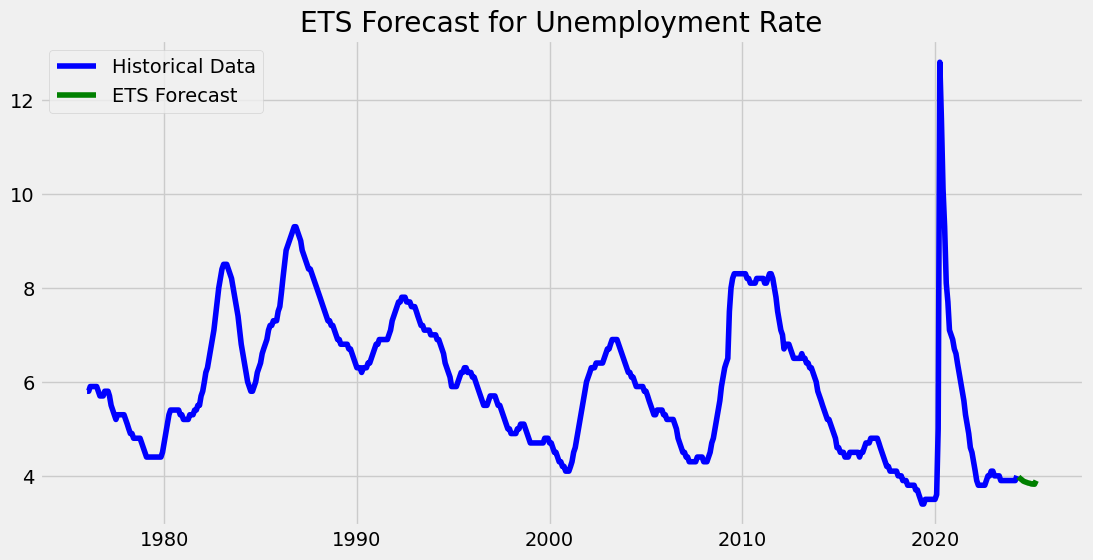

In [83]:
# Fit the ETS model
ets_model = ExponentialSmoothing(
    data,
    trend='mul',        # Choose 'add' or 'mul' for trend
    seasonal='mul',     # Choose 'add' or 'mul' for seasonality
    seasonal_periods=12 # Adjust based on your data's seasonality
).fit()

# Forecast the next 12 periods
ets_forecast = ets_model.forecast(steps=12)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data', color='blue')
plt.plot(ets_forecast, label='ETS Forecast', color='green')
plt.title('ETS Forecast for Unemployment Rate')
plt.legend()
plt.show()
